# **Title**: **1985 Auto Imports Database**

# **Problem Statement**

* Prepare a complete data analysis report on the given data.

* Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels




# **Source Information:**

   * Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   * Date: 19 May 1987
   * Sources:
     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
        Automotive Yearbook.
     2) Personal Auto Manuals, Insurance Services Office, 160 Water
        Street, New York, NY 10038
     3) Insurance Collision Report, Insurance Institute for Highway
        Safety, Watergate 600, Washington, DC 20037


# **Description**

This data set consists of three types of entities:

(a) the specification of an auto in terms of various characteristics,

(b)its assigned insurance risk rating,

(c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which the auto is more risky than its price indicates.Cars are initially assigned a risk factor symbol associated with its price.   Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "**symboling**".  
A value of +3 indicates that the auto isrisky, -3 that it is probably pretty safe.The third factor is the relative average loss payment per insured vehicle year.  
This value is normalized for all autos within a particular size classification (two-door small, station wagons,sports/speciality, etc...), and represents the average loss per car per year.

-- Note: Several of the attributes in the database could be used as a
            "class" attribute.

* Number of Instances: 205

* Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

* Attribute Information:     
    
  1. symboling:-3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:continuous from 65 to 256.
  3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,
  mitsubishi, nissan, peugot, plymouth, porsche renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

## **Task 1** : Prepare a complete data analysis report on the given data.

# **Import Basic libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


# **Import Datasets as df**

In [ ]:
df = pd.read_csv("/content/auto_imports.csv")

In [ ]:
df.to_csv(
    'auto_imports.csv',
    header=["symboling", "normalized-losses", "make", "fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"],
    index=False)
# In dataset we don't have header so we add Dataset header

# **Basic Checks**

In [ ]:
df.head() # first 5 rows

,symboling,normalized_losses,make,fuel-type,aspiaration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Insights
* in this Dataset, Price is a Outcome column
* And price is dependent on all those features which are availble in Datasets
*   Price is the Target.
*   Make,model,year,fuel,engine are independant variables.

*   Attributes like make, model, year, and body type can influence prices. Newer models and luxury brands tend to command higher prices.
*   This data is basically tell us about the Price by the management.

* They can accordingly manipulate the design of the cars, the business strategy etc.. to meet certain price levels.

In [ ]:
# shape
df.shape

(201, 26)

In [ ]:
# Columns
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel-type', 'aspiaration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cyilnders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiaration        201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cyilnders   201 non-null    object 
 16  engine-size        201 non

In [ ]:
# data types
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel-type             object
aspiaration           object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cyilnders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.0,0.0,1.0,2.0,3.0
normalized_losses,164.0,122.000000,35.442168,65.0,94.0,115.0,150.0,256.0
wheel-base,201.0,98.797015,6.066366,86.6,94.5,97.0,102.4,120.9
length,201.0,174.200995,12.322175,141.1,166.8,173.2,183.5,208.1
width,201.0,65.889055,2.101471,60.3,64.1,65.5,66.6,72.0
height,201.0,53.766667,2.447822,47.8,52.0,54.1,55.5,59.8
curb-weight,201.0,2555.666667,517.296727,1488.0,2169.0,2414.0,2926.0,4066.0
engine-size,201.0,126.875622,41.546834,61.0,98.0,120.0,141.0,326.0
compression-ratio,201.0,10.164279,4.004965,7.0,8.6,9.0,9.4,23.0
city-mpg,201.0,25.179104,6.423220,13.0,19.0,24.0,30.0,49.0


## **Insights**
* Maximum price of the vehicle is 45400
* minimum price of the vehicle is 5118.0


In [ ]:
# check for missing values
df.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel-type             0
aspiaration           0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cyilnders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

#**Domain Analysis**
*   Price is the Target.

*   Make,model,year,fuel,engine are independant variables.

*   Attributes like make, model, year, and body type can influence prices. Newer models and luxury brands tend to command higher prices.
*   This data is basically tell us about the Price by the management.

* They can accordingly manipulate the design of the cars, the business strategy etc.. to meet certain price levels.

**Symboling**: It Corresponds to a car's insurance risk level.

**Normalized Losses**: It is the relative average loss payment per insured vehicle year.

**Make:** It refers to the brand of the vehicle.

**Aspiration:** A naturally aspirated engine is an internal combustion engine in which air intake depends solely on atmospheric pressure.

**FuelSystem: **The fuel system in a vehicle is the combination of parts needed to carry fuel into and out of the engine.

**WheelBase:** A car's wheelbase is the distance between the centres of the front and rear wheels.

**BodyStyle:** A Car's Body Style refers to the shape and size of your car, and with a multitude of various body styles.

**HorsePower:** Horsepower is a measurement used to calculate how quickly the force is produced from a vehicle's engine.

**PeakRpm:** The normal RPM range for cars on highways is generally between 1500 rpm and 2000 rpm.

**Compression Ratio:** The compression ratio (CR) is defined as the ratio of the volume of the cylinder and its head space.

**Bore and Stroke:** An engine's bore is the diameter of each cylinder, while the stroke is the distance within the cylinder the piston travels.

**City mpg and Highway mpg:** The score a car will get on average in city conditions, with stopping and starting at lower speeds.The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.


# **Exploratory Data Analysis**
* **Univariate Analysis**
* **Bivariate Analysis**
* **Multivarite Analysis**

# **Univariate**

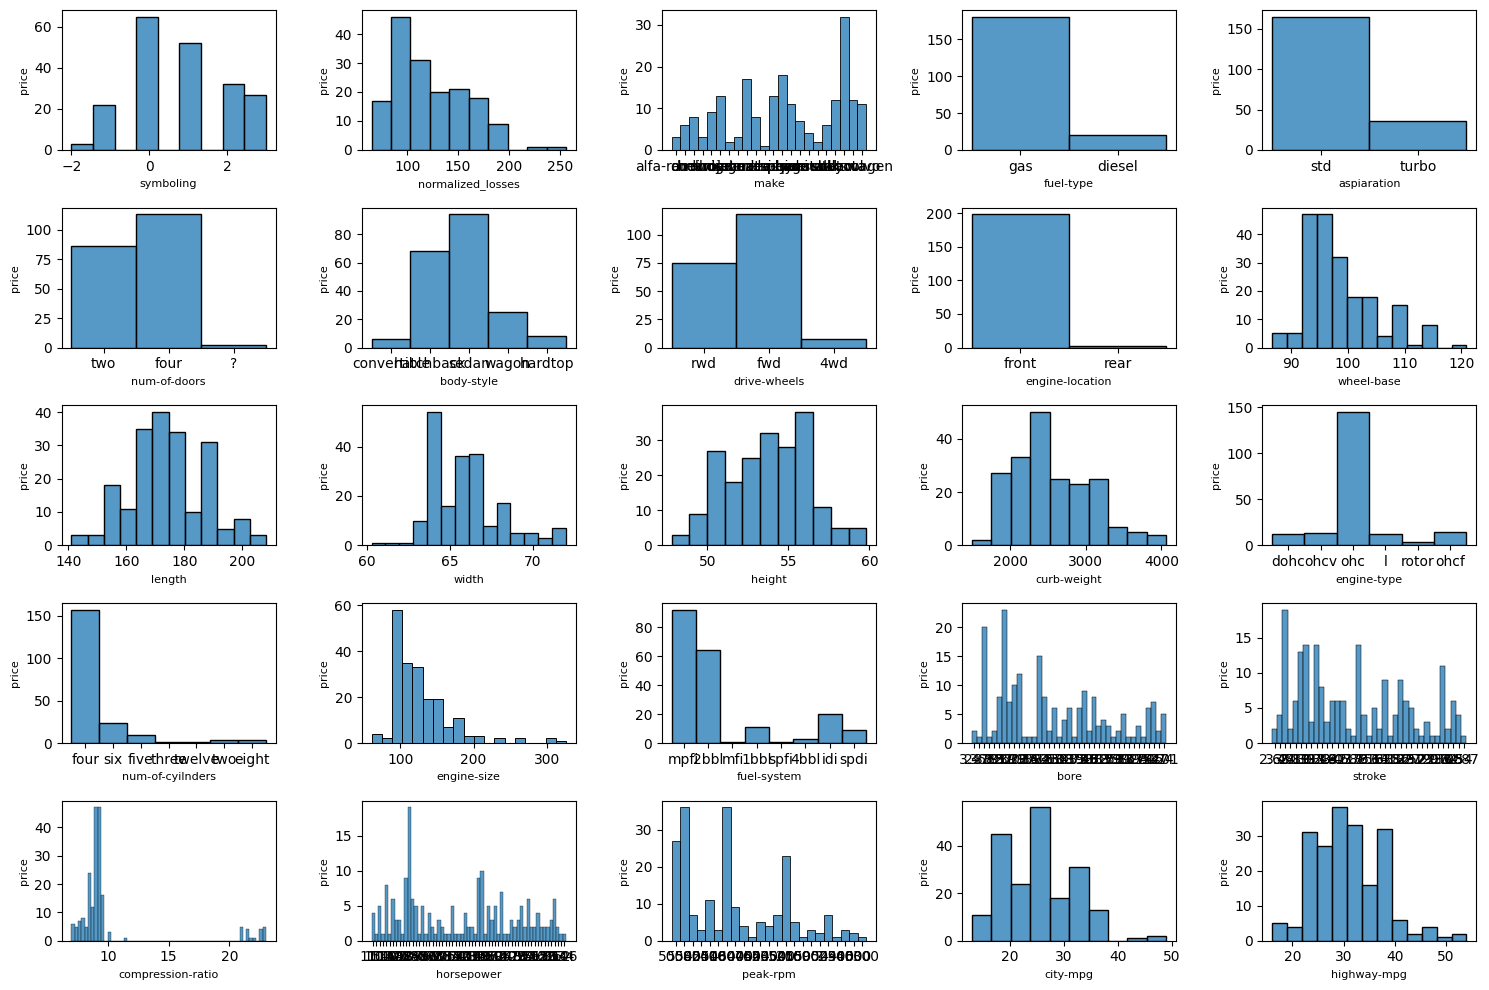

In [ ]:
# Check the Distribution of data
plt.figure(figsize=(15,10),facecolor="white")
plotnumber=1
for column in df:
  if plotnumber<=25:
    ax=plt.subplot(5,5,plotnumber)
    sns.histplot(x=df[column])
    plt.xlabel(column,fontsize=8)
    plt.ylabel("price",fontsize=8)
  plotnumber+=1
plt.tight_layout()

#**Insights**



*  Car insurance risk level lies between -2 to +2 are the majority values.

*  82% of cars are Average payment loss per year.

*   More than 15% of cars prices belongs to the Toyota,Mazda,nissan and mitsubishi,honda,volkswagon,volvo,peugot,subaru are nearer to 5% and audi,benz,bmw,jaguar are less than 4%

*   Mostly Four doors are likely to use Two doors are slightly less in price.
*   Highly concentrate with Gas fuel comparing to diesel.


*  Standard Aspiration is More price level than the turbo aspiration.




*  Almost every car works better with front wheel drives(fwd) rather than the rear wheel drives(rwd)




*  All people are likely to use engine location is in front side. Thus the price value will be high comparing to rear side engine.


*   Wheel base distance from front wheel to rear wheel ranges from 95 to 102


*   Length of the cars average between 160 to 180 At the same time price will be high in these values. similarly High prices of cars are mostly in heights range from 50 to 55

*   Ohc type of engine is more values among the others like rotor,ohcf,dohc etc..

*   Price will be high which Contains four cylinders.
*  Engine Size should be vary from 100 to 150 in range.


*   Mpfi fuel system is affordable in price.

*   Peak_rpm is generally high in between 4800 to 5200 hence the price value is more for this range.
*   Compression Ratio is defined above 60%

*   Bore,stroke,horsepower ratios are in oscillatory in prices.









# **Bivariate Analysis**

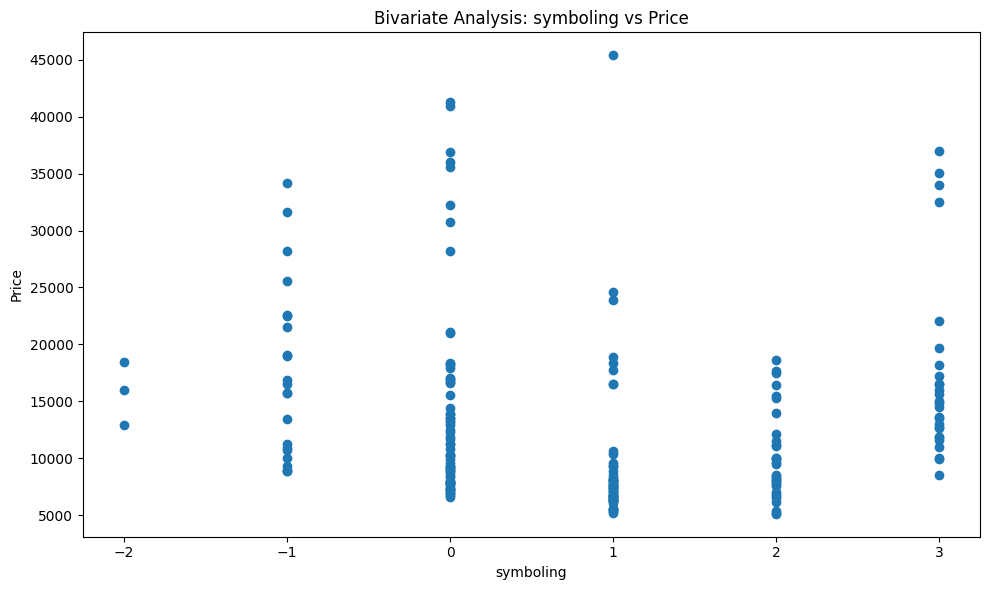

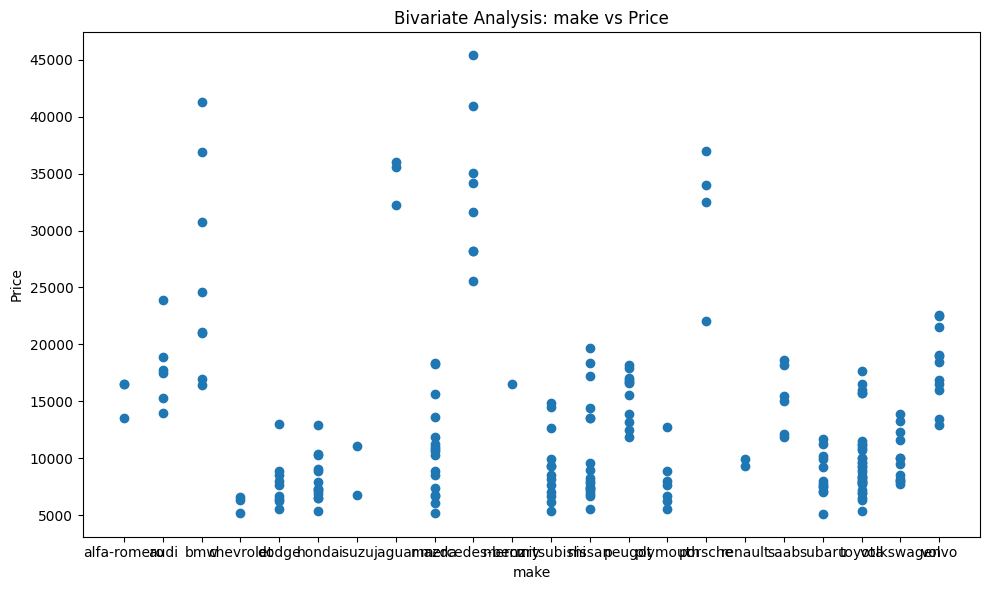

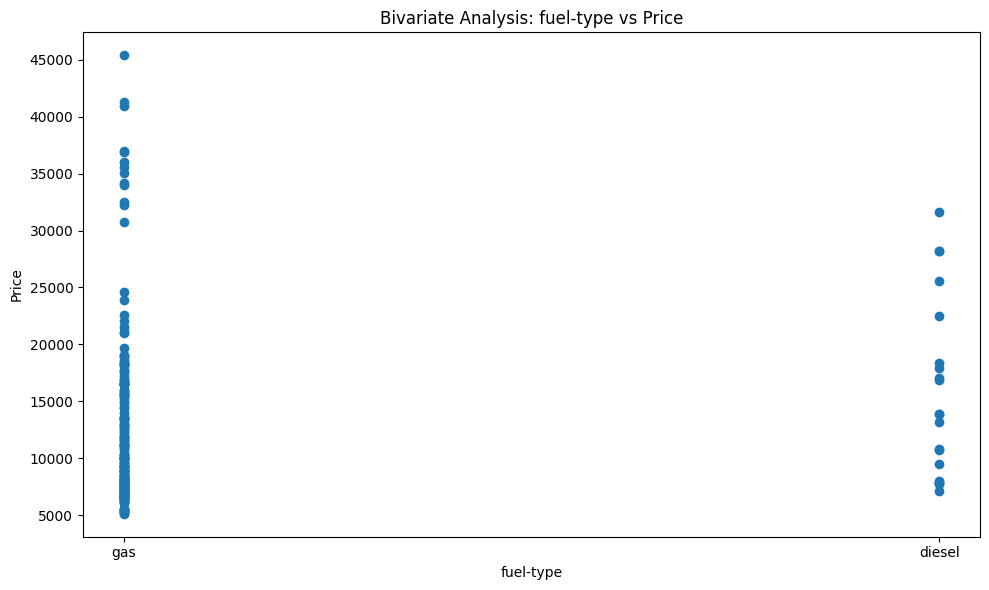

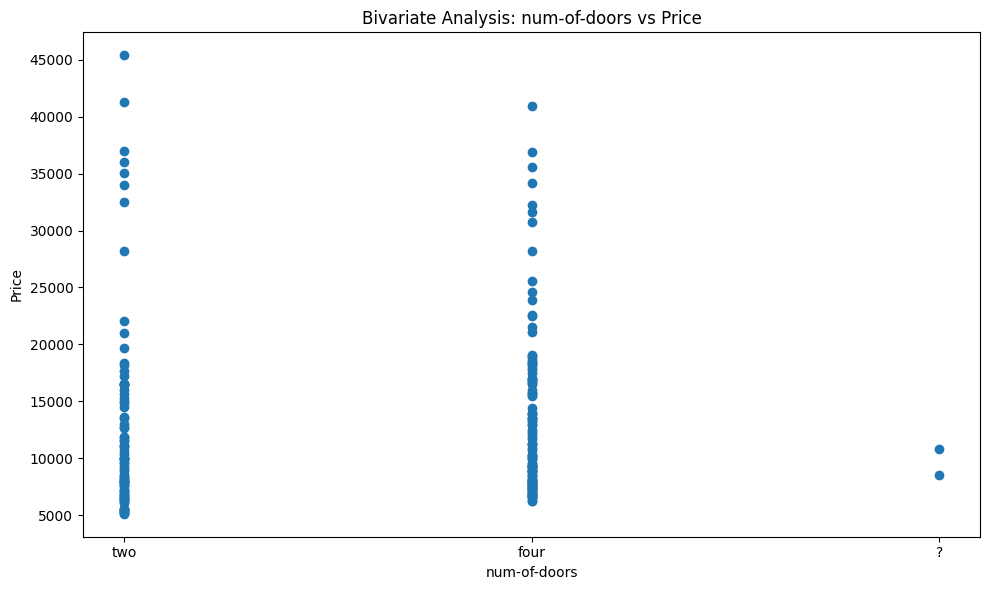

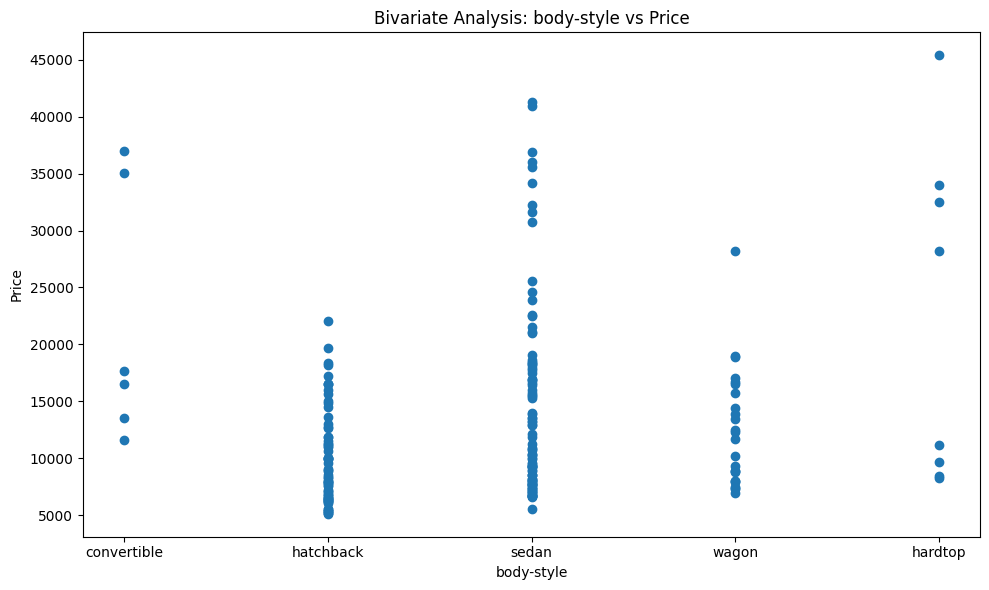

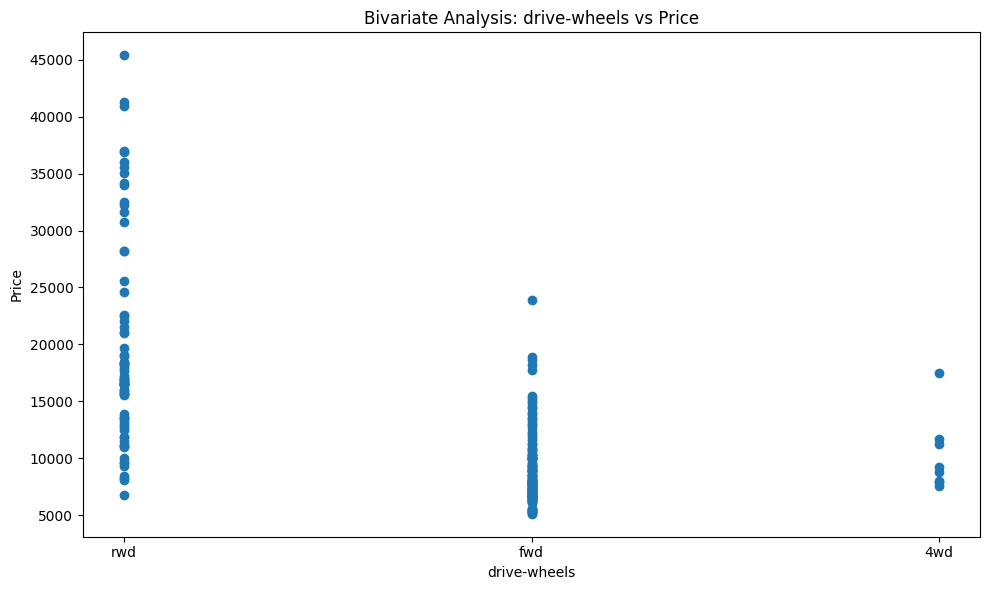

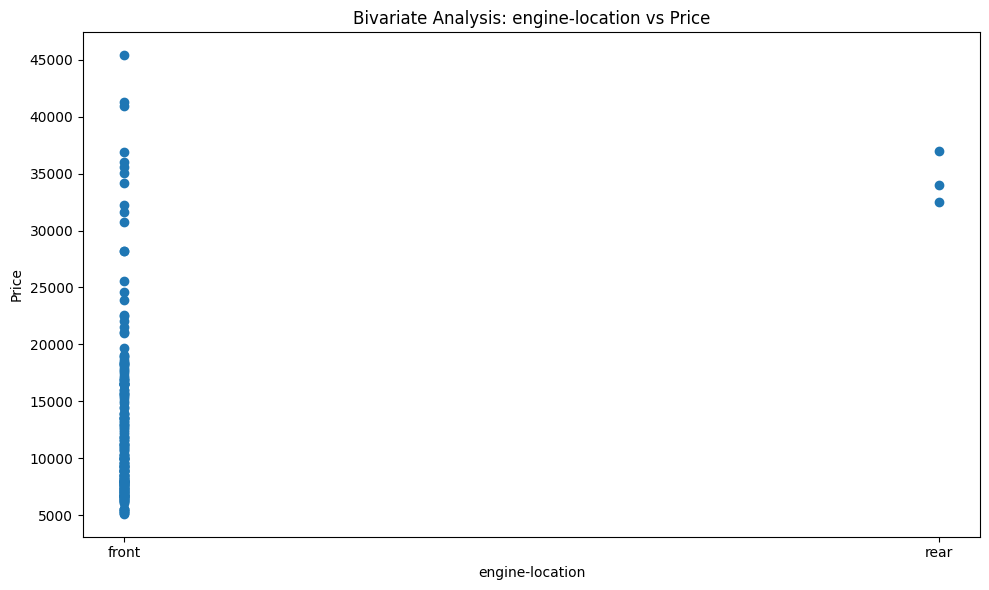

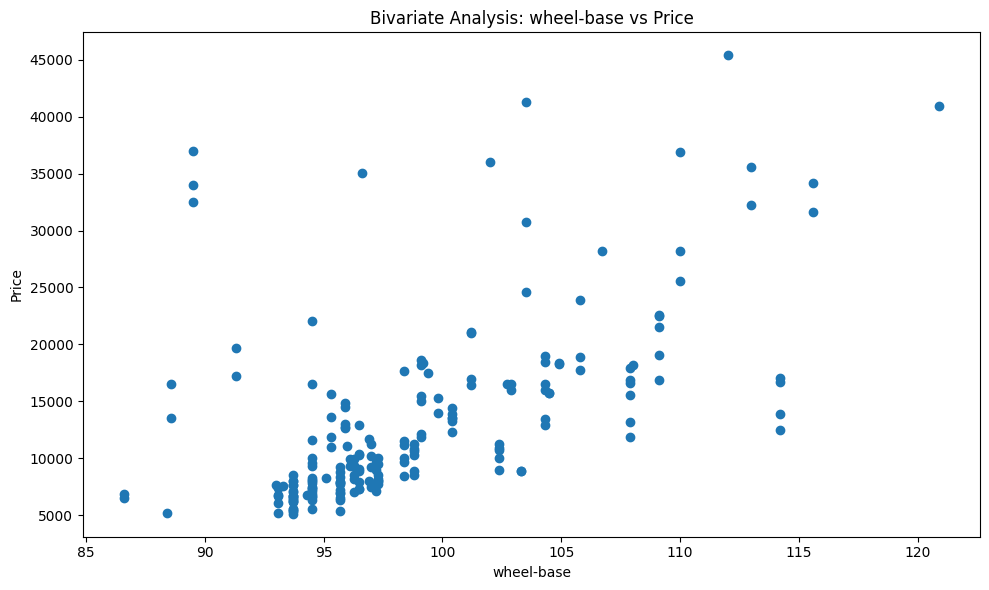

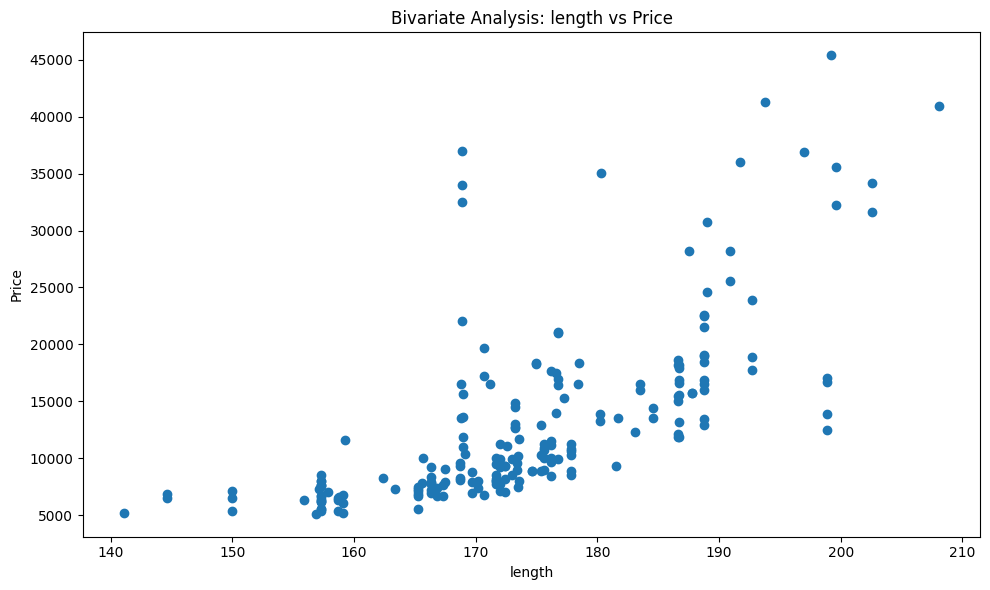

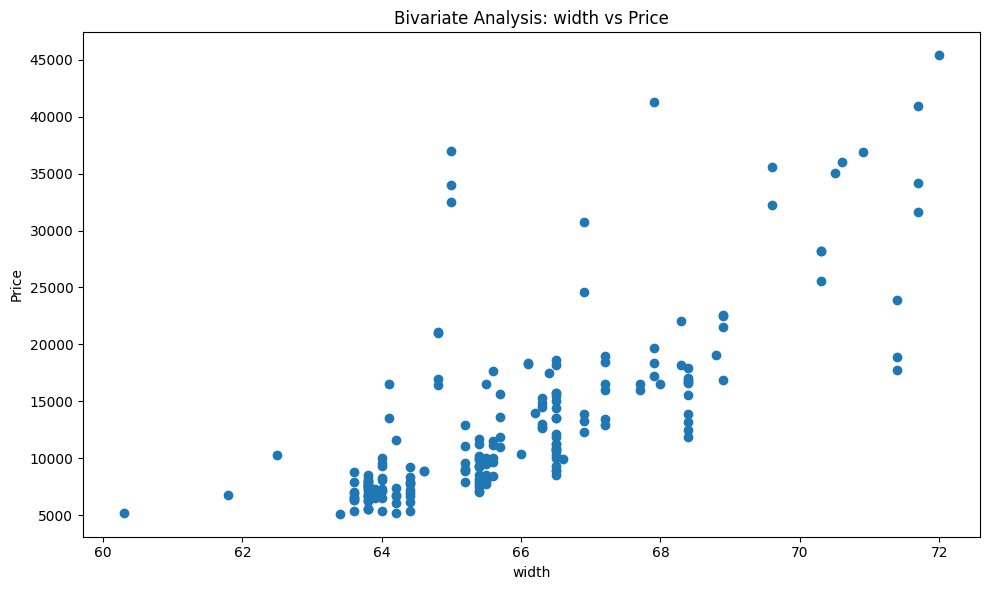

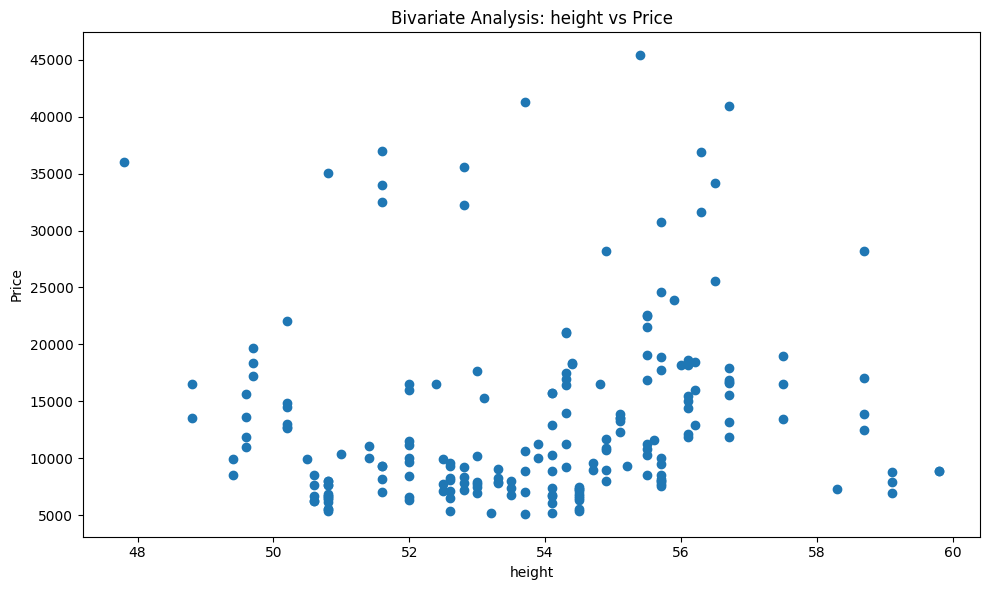

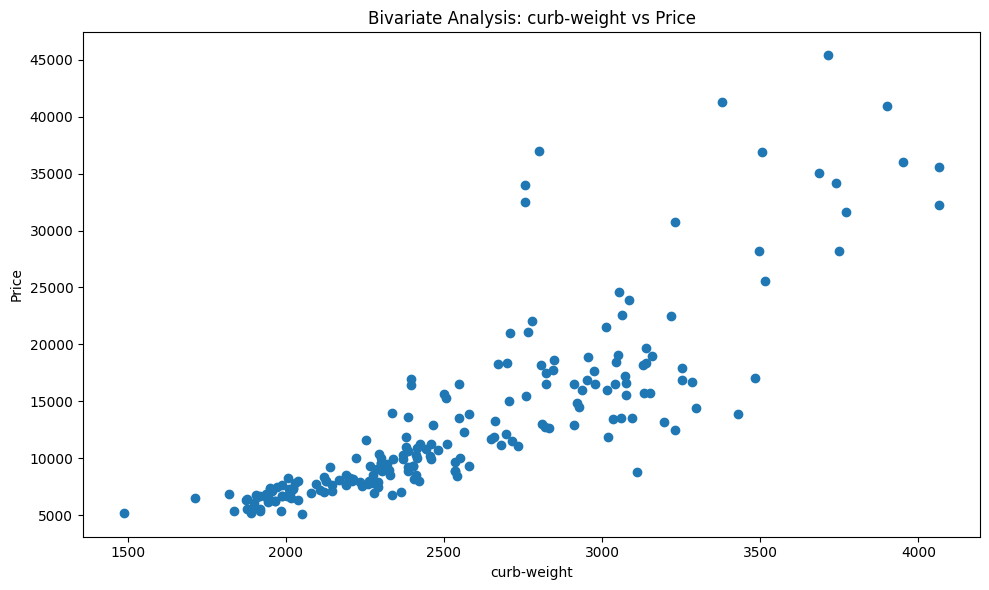

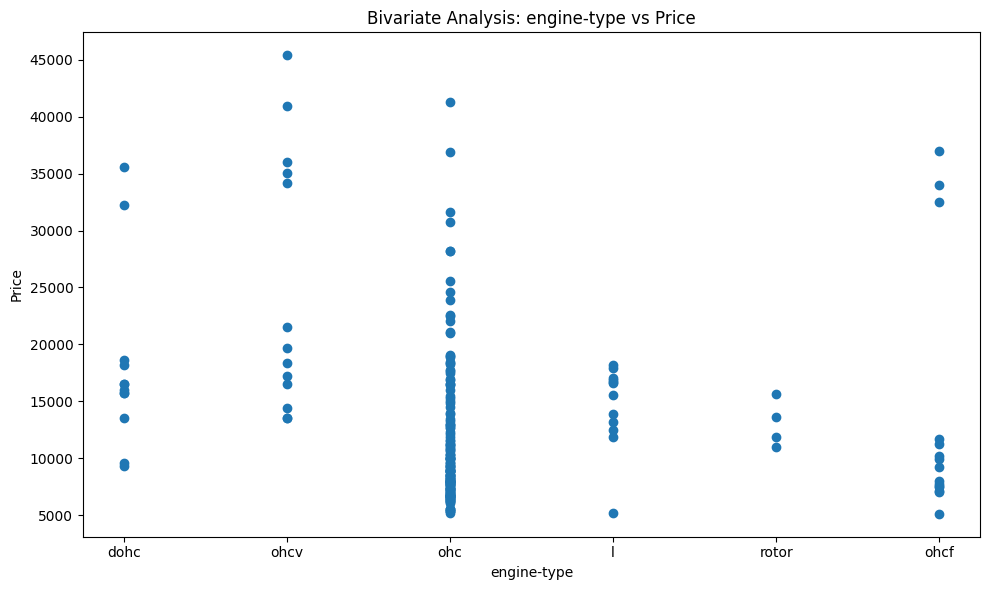

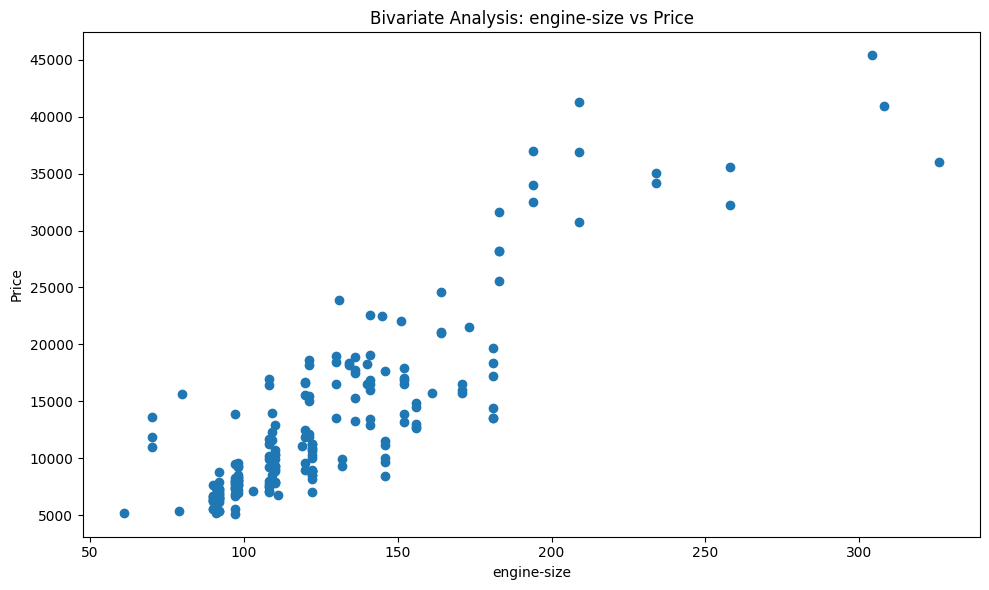

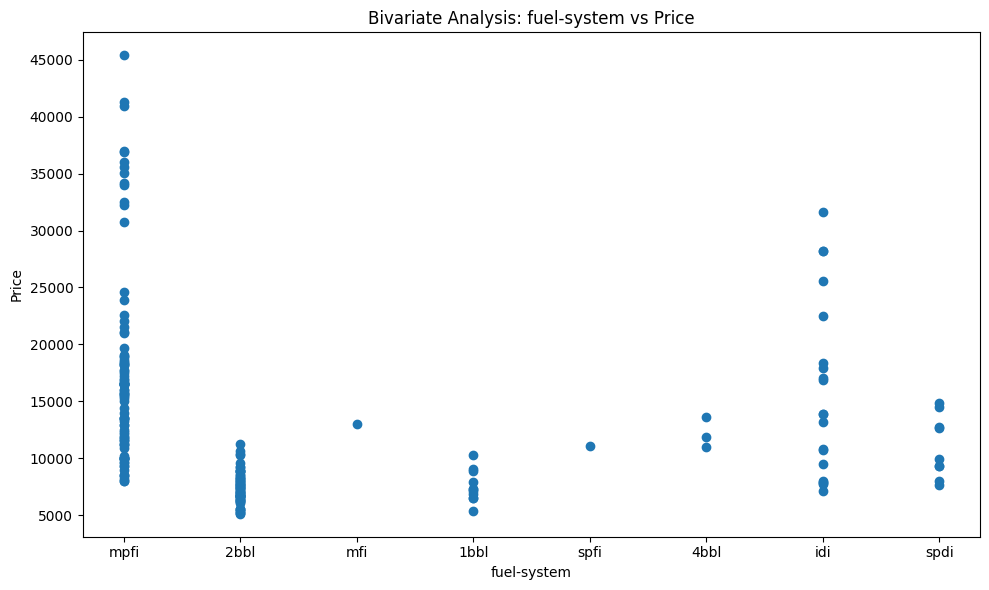

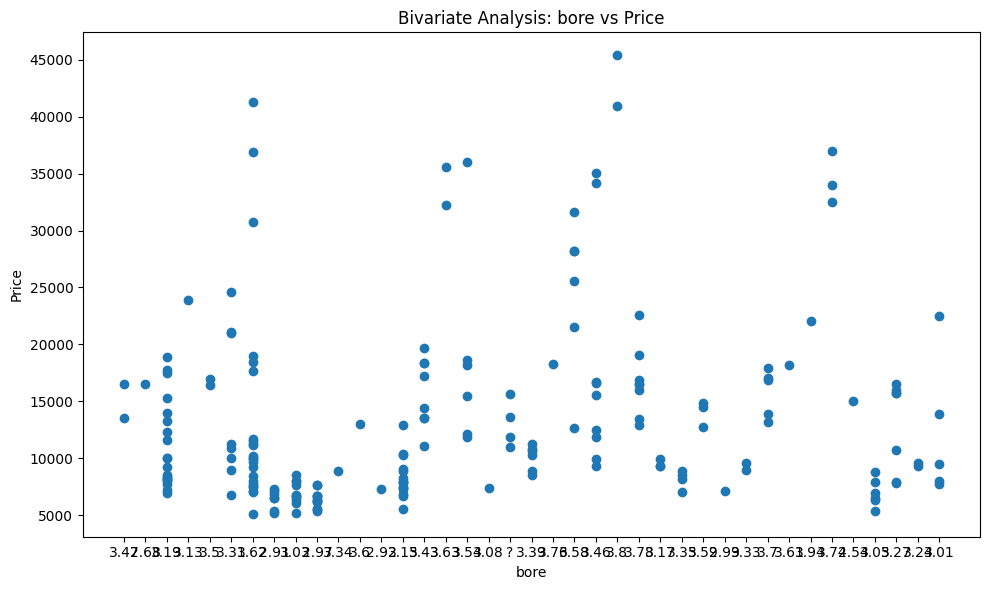

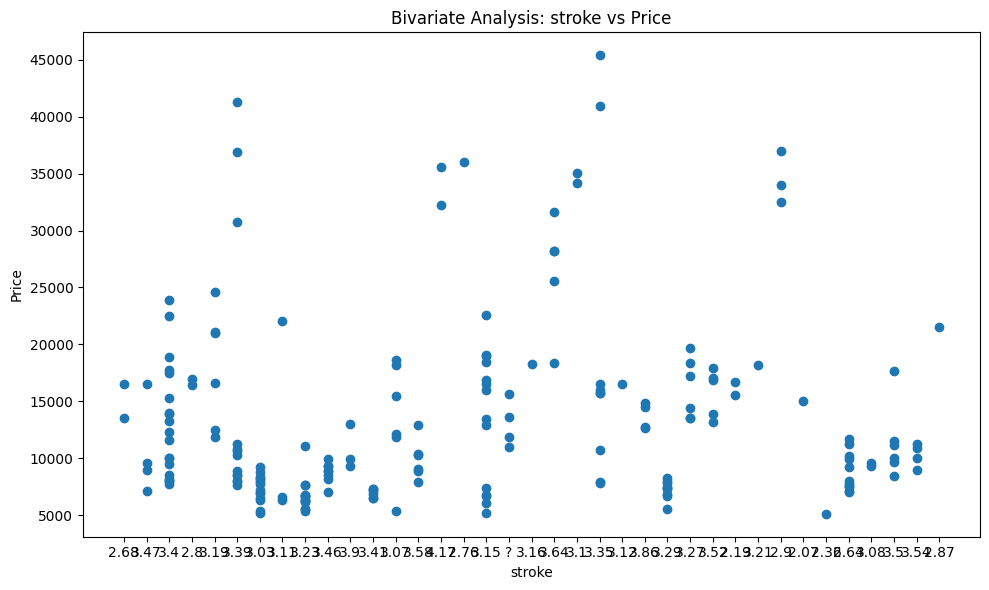

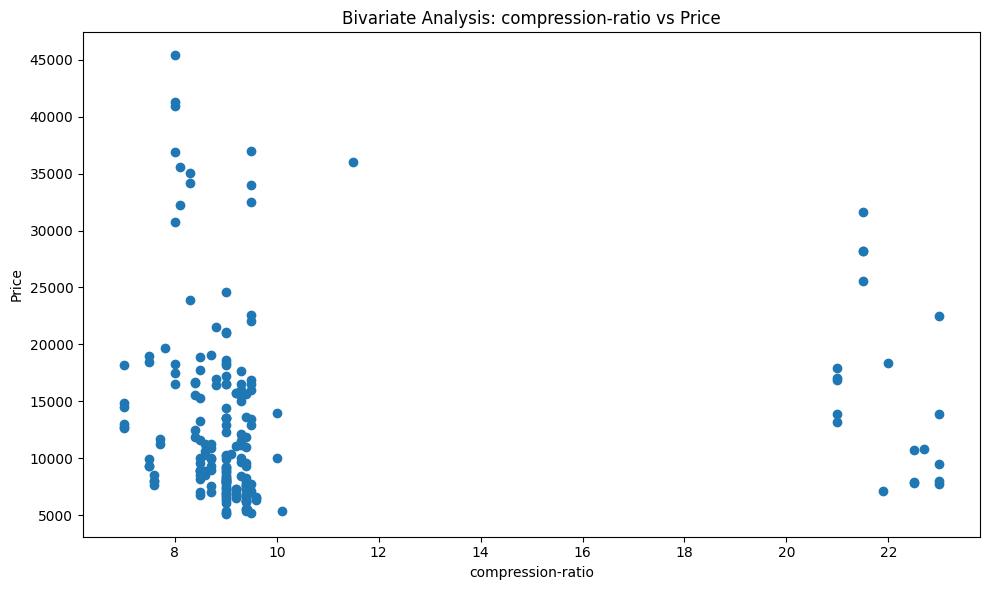

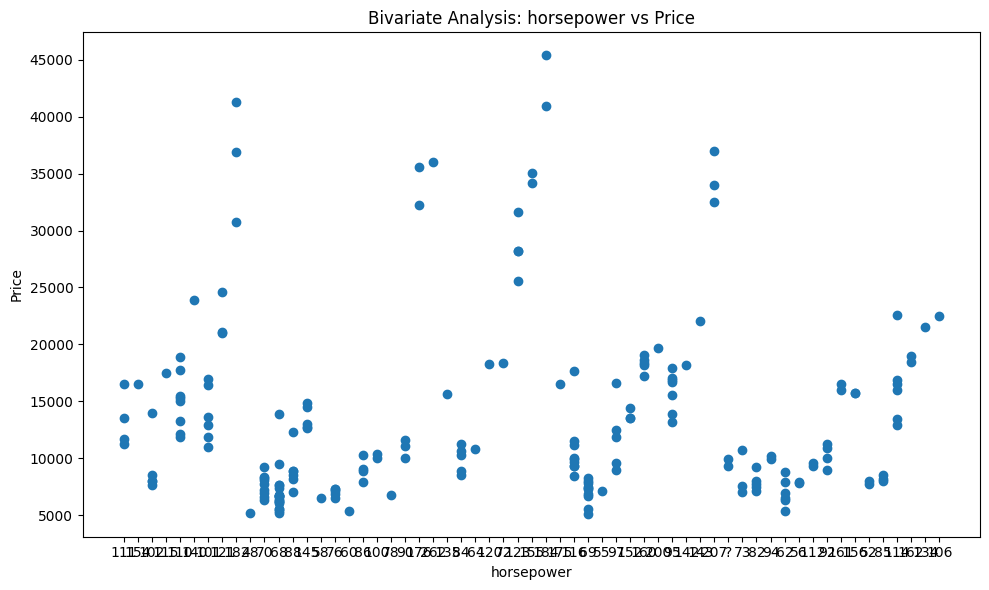

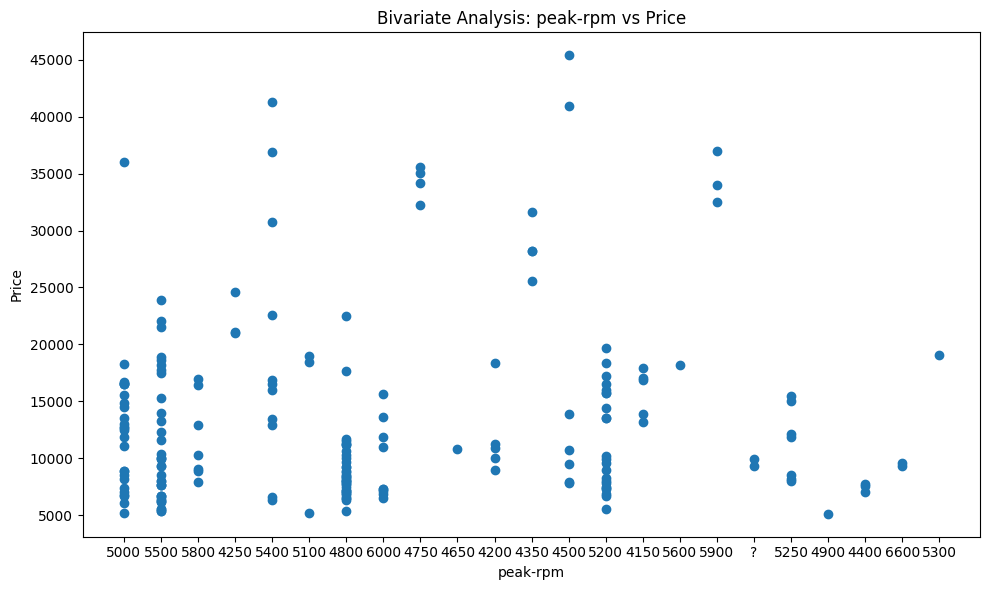

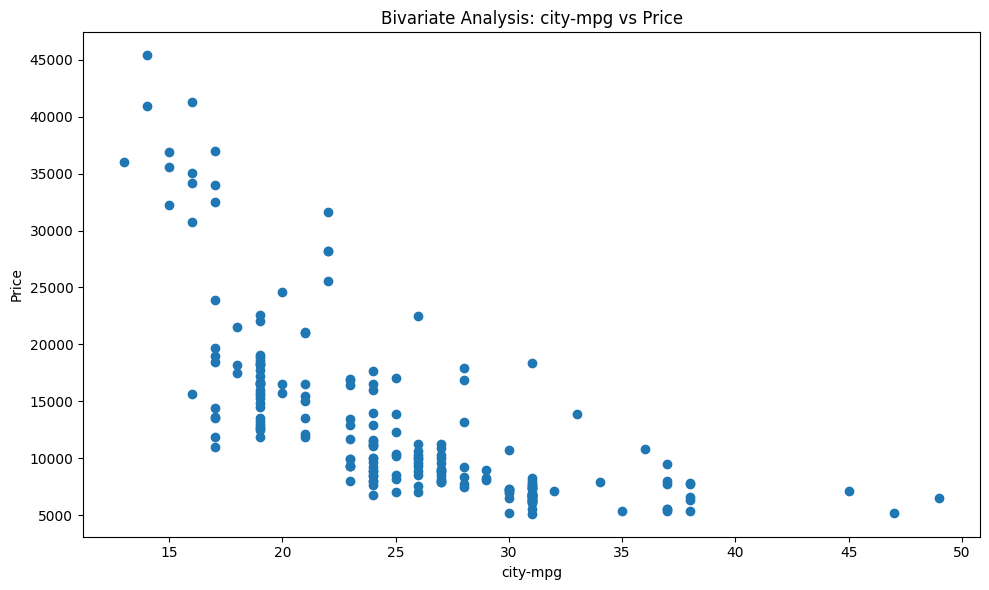

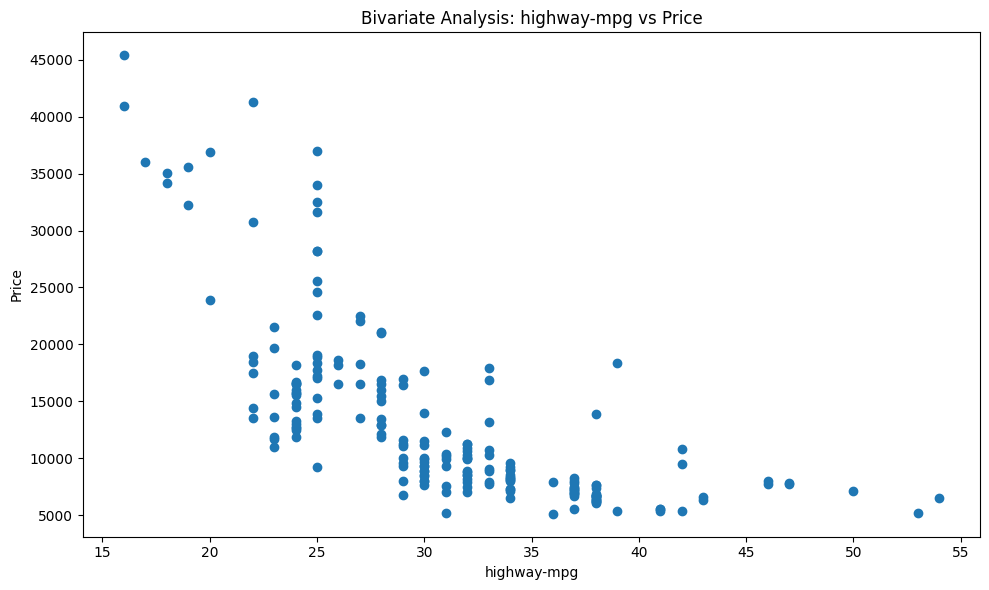

In [ ]:
# List of columns to analyze against the 'price' column
columns_to_analyze = ["symboling", "make", "fuel-type", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]

# Loop through each column for analysis
for column in columns_to_analyze:
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df[column], df['price'])
    plt.title(f'Bivariate Analysis: {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

## **Insights**
* Symboling vs Price:
There isn't a clear trend between the car's risk rating (symboling) and its price. Prices seem to be scattered across different symboling values.
Make vs Price:

* make vsprice:
Car manufacturers seem to have a significant impact on prices. Some brands tend to produce cars with higher prices, while others offer more affordable options.

* Fuel Type vs Price:
Cars with different fuel types (gas or diesel) show a varied price distribution. Diesel cars might have slightly lower prices than gas cars.

* Number of Doors vs Price:
The number of doors doesn't seem to have a strong connection with the car's price. Both two-door and four-door cars are spread across a range of prices.

* Body Style vs Price:
Different body styles (sedan, hatchback, etc.) have different price ranges. For instance, some body styles tend to be priced higher, possibly due to their features or design. Hardtop have a higher price than other style cars.

* Drive Wheels vs Price:
Cars with different drive wheel configurations (e.g., front-wheel drive, rear-wheel driveand four wheel drive) exhibit price variations. Rear wheel drive  configurations have very large number of cars and front wheel drive cars have more price range from low buget car to higher budget cars

* Engine Location vs Price:
Cars with engines placed in different locations (front or rear) have a diverse price distribution. Front engine have relatively more than rear engine.

* Other Numeric Features (e.g., Wheel Base, Length, Width, etc.) vs Price:
Generally, as these features increase, the car prices tend to rise. This suggests that larger cars with more substantial dimensions can often be more expensive.

* Curb Weight vs Price:
Heavier cars tend to have higher prices. This could be due to the use of more advanced materials or larger engines in heavier vehicles.
Engine Type and Size vs Price:

* Engine typre Vs price: Cars with different engine types and sizes show variations in prices. Cars with larger engines might command higher prices.

* Fuel System, Bore, Stroke, Compression Ratio vs Price:
The relationship here might not be as straightforward, as there are several factors at play. Different fuel systems and engine specifications contribute to diverse pricing.

* Horsepower, Peak RPM vs Price:
Generally, cars with higher horsepower and peak RPMs tend to have higher prices, as more powerful engines often come at a premium.
Fuel Efficiency (City MPG, Highway MPG) vs Price:

* Cars with better fuel efficiency (higher MPG) might be priced slightly higher due to the cost-saving advantage they offer over time.

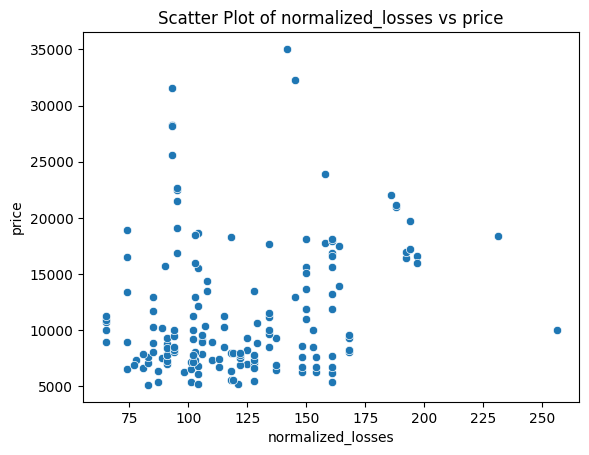

In [ ]:
sns.scatterplot(data=df, x='normalized_losses', y='price')
plt.xlabel('normalized_losses')
plt.ylabel('price')
plt.title('Scatter Plot of normalized_losses vs price')
plt.show()

# **Insights**:
* In the scatter plot, the points seem to be scattered without a clear upward or downward trend. This suggests that there isn't a strong linear relationship between normalized losses and the price of the vehicles.
* cross different normalized loss values, there is a wide range of prices. This suggests that normalized losses alone might not be a significant predictor of price.

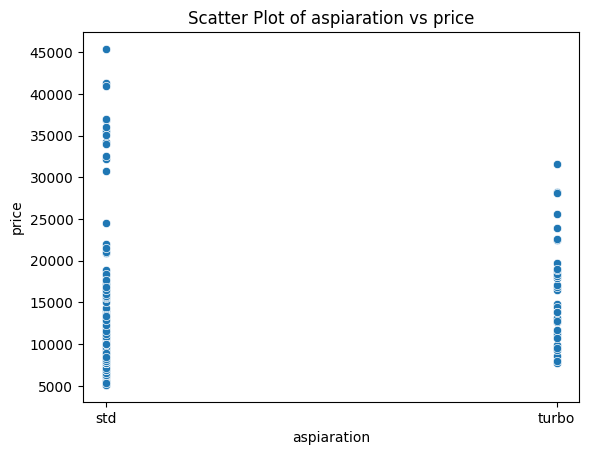

In [ ]:
sns.scatterplot(data=df, x='aspiaration', y='price')
plt.xlabel('aspiaration')
plt.ylabel('price')
plt.title('Scatter Plot of aspiaration vs price')
plt.show()

* The scatter plot reveals that there are two distinct groups of points along the y-axis (price). These groups likely correspond to the two aspiration types: standard and turbocharged. Vehicles with turbocharged aspiration tend to have lower prices compared to vehicles with standard aspiration.
* You can observe that for both aspiration types, the prices of vehicles vary. However, the prices of turbocharged vehicles generally tend to be lower, and standard exhibit a wider price range compared to standard aspirated vehicles.

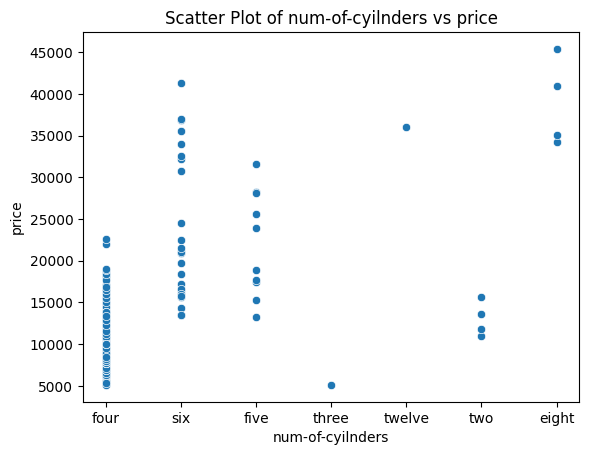

In [ ]:
sns.scatterplot(data=df, x='num-of-cyilnders', y='price')
plt.xlabel('num-of-cyilnders')
plt.ylabel('price')
plt.title('Scatter Plot of num-of-cyilnders vs price')
plt.show()

* The scatter plot reveals a relationship between the number of cylinders ("num-of-cylinders") and the price of automobiles. The plot indicates that different cylinder counts have distinct price ranges.
* Vehicles with higher cylinder counts tend to exhibit higher prices. This suggests that automobiles with more cylinders are generally considered higher-performance models and are priced accordingly.

# **Multivarite Analysis**